<a href="https://colab.research.google.com/github/RisyadFaisalH/Machine-Learning--Clustering-/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from scipy import stats

In [48]:
data = pd.read_csv('https://github.com/RisyadFaisalH/Machine-Learning--Clustering-/blob/604cb2105162130a5c0dbd356449b90db9f1085a/kendaraan_train.csv?raw=true')
data

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
285826,285827,Wanita,23.0,1.0,4.0,1.0,< 1 Tahun,Tidak,25988.0,152.0,217.0,0
285827,285828,Wanita,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,44686.0,152.0,50.0,0
285828,285829,Wanita,23.0,1.0,50.0,1.0,< 1 Tahun,Tidak,49751.0,152.0,226.0,0
285829,285830,Pria,68.0,1.0,7.0,1.0,1-2 Tahun,Tidak,30503.0,124.0,270.0,0


**PRE-PROCESSING**

In [49]:
#TRANSFORMATION ATTRIBUTE
data['Jenis_Kelamin'] = data['Jenis_Kelamin'].replace('Pria', '1')
data['Jenis_Kelamin'] = data['Jenis_Kelamin'].replace('Wanita', '0')
data['Kendaraan_Rusak'] = data['Kendaraan_Rusak'].replace('Pernah', '1')
data['Kendaraan_Rusak'] = data['Kendaraan_Rusak'].replace('Tidak', '0')
data['Umur_Kendaraan'] = data['Umur_Kendaraan'].replace('< 1 Tahun', '0')
data['Umur_Kendaraan'] = data['Umur_Kendaraan'].replace('1-2 Tahun', '1')
data['Umur_Kendaraan'] = data['Umur_Kendaraan'].replace('> 2 Tahun', '2')

In [50]:
#Drop Uneccesarry Column
X = data.drop(['Jenis_Kelamin','id','Tertarik','Umur_Kendaraan', 'Kendaraan_Rusak'], axis = 1)
X

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan
0,30.0,1.0,33.0,1.0,28029.0,152.0,97.0
1,48.0,1.0,39.0,0.0,25800.0,29.0,158.0
2,21.0,1.0,46.0,1.0,32733.0,160.0,119.0
3,58.0,1.0,48.0,0.0,2630.0,124.0,63.0
4,50.0,1.0,35.0,0.0,34857.0,88.0,194.0
...,...,...,...,...,...,...,...
285826,23.0,1.0,4.0,1.0,25988.0,152.0,217.0
285827,21.0,1.0,46.0,1.0,44686.0,152.0,50.0
285828,23.0,1.0,50.0,1.0,49751.0,152.0,226.0
285829,68.0,1.0,7.0,1.0,30503.0,124.0,270.0


In [51]:
#INFO FOR NEW TABLE
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285831 entries, 0 to 285830
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur               271617 non-null  float64
 1   SIM                271427 non-null  float64
 2   Kode_Daerah        271525 non-null  float64
 3   Sudah_Asuransi     271602 non-null  float64
 4   Premi              271262 non-null  float64
 5   Kanal_Penjualan    271532 non-null  float64
 6   Lama_Berlangganan  271839 non-null  float64
dtypes: float64(7)
memory usage: 15.3 MB


In [52]:
#CHECK NUMBER OF INSTANCE AND ATTRIBUTES
print('Number of instances = %d' % (X.shape[0]))
print('Number of attributes = %d' % (X.shape[1]))

Number of instances = 285831
Number of attributes = 7


In [53]:
#CHECKING
X.describe()

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan
count,271617.000000,271427.000000,271525.000000,271602.000000,271262.000000,271532.000000,271839.000000
mean,38.844336,0.997848,26.405410,0.458778,30536.683472,112.021567,154.286302
std,15.522487,0.046335,13.252714,0.498299,17155.000770,54.202457,83.694910
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000
25%,25.000000,1.000000,15.000000,0.000000,24398.000000,29.000000,82.000000
50%,36.000000,1.000000,28.000000,0.000000,31646.000000,132.000000,154.000000
75%,49.000000,1.000000,35.000000,1.000000,39377.750000,152.000000,227.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000


**HANDLING AND VISUALIZE OUTLIERS**



In [71]:
z = np.abs(stats.zscore(data))
print(z)
threshold = 2
print(np.where(z > 2))

print(z[40][0])

[[0.56944227 0.73621205]
 [0.59016518 1.53529593]
 [1.149246   0.88395241]
 ...
 [1.02040072 0.73621205]
 [1.87861791 0.2191208 ]
 [0.39689727 1.59069857]]
(array([    40,     63,     75, ..., 199480, 199487, 199497]), array([0, 0, 0, ..., 0, 0, 0]))
2.0718858177718986


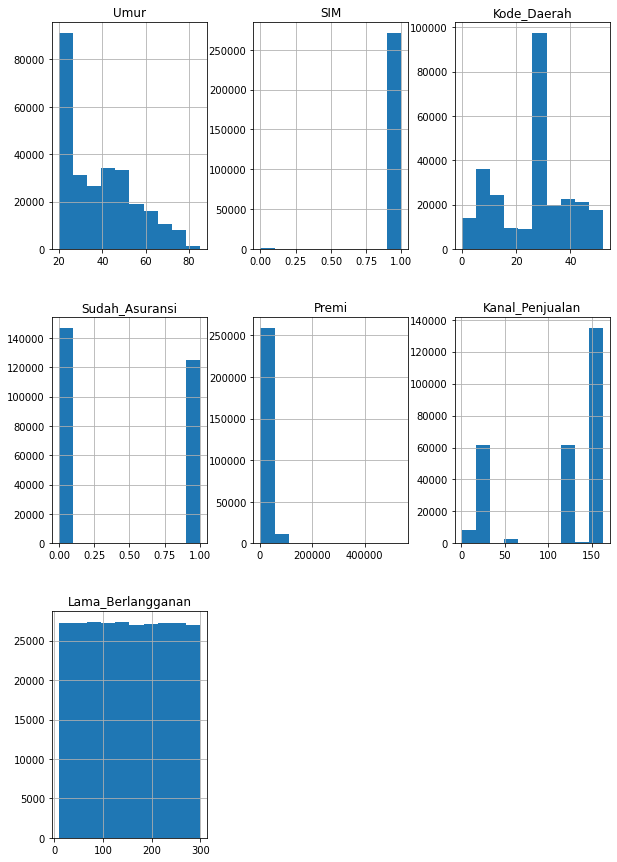

In [54]:
X.hist(figsize= (10, 15));

In [55]:
X.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Premi,Kanal_Penjualan,Lama_Berlangganan
Umur,1.0,-0.079,0.044,-0.26,0.065,-0.58,0.00015
SIM,-0.079,1.0,-0.0034,0.016,-0.011,0.043,-0.0013
Kode_Daerah,0.044,-0.0034,1.0,-0.025,-0.012,-0.043,-0.0036
Sudah_Asuransi,-0.26,0.016,-0.025,1.0,0.0059,0.22,0.0028
Premi,0.065,-0.011,-0.012,0.0059,1.0,-0.11,-0.00075
Kanal_Penjualan,-0.58,0.043,-0.043,0.22,-0.11,1.0,0.00033
Lama_Berlangganan,0.00015,-0.0013,-0.0036,0.0028,-0.00075,0.00033,1.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

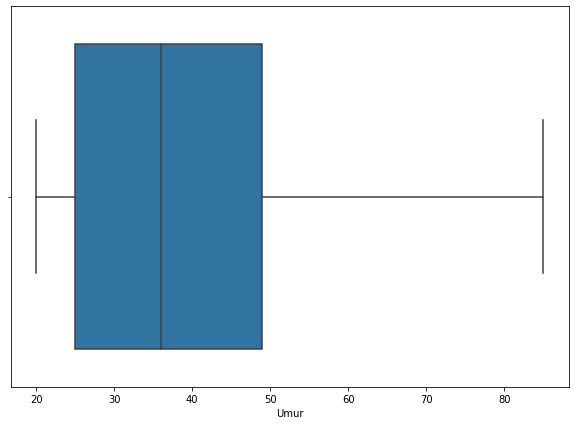

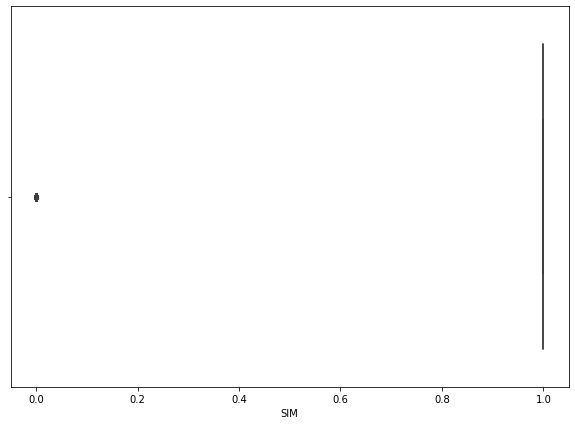

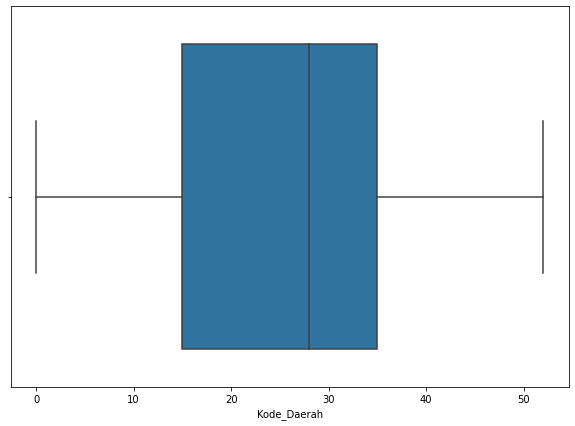

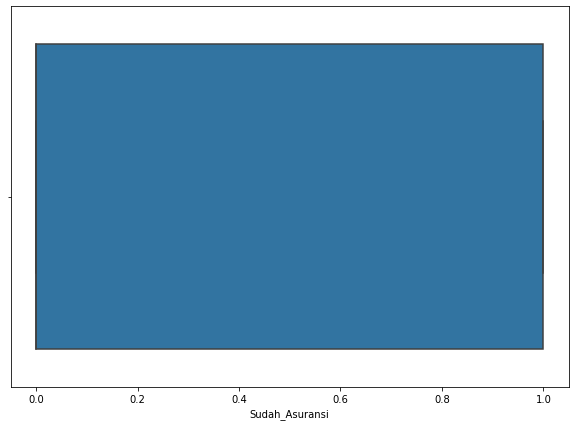

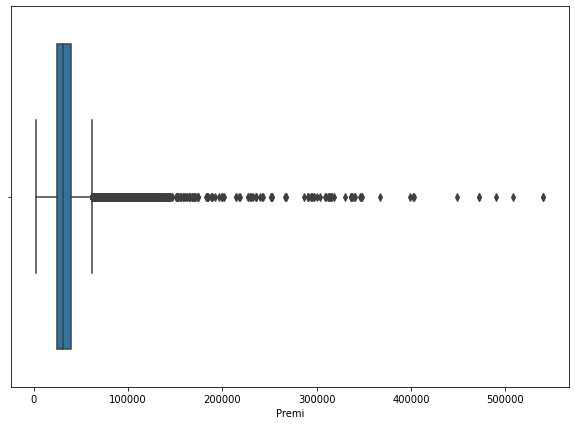

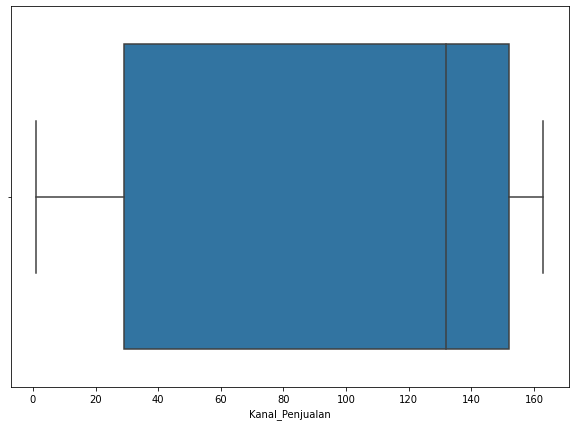

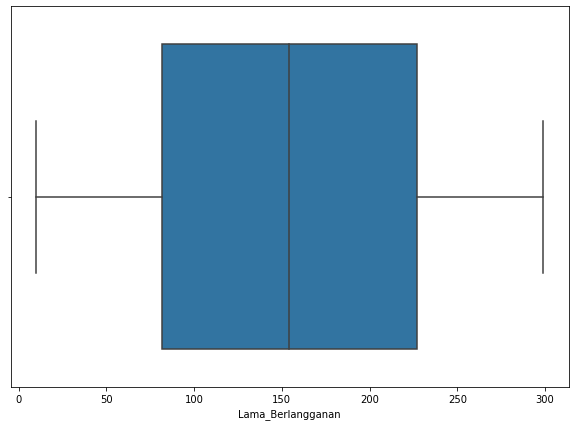

In [56]:
column = ['Umur', 'SIM', 'Kode_Daerah', 'Sudah_Asuransi', 'Premi', 'Kanal_Penjualan', 'Lama_Berlangganan']

X[column].fillna(X[column].mean(), inplace = True)

for col in column:
  fig = plt.figure(figsize=(10,7))

  sns.boxplot(X[col])

**IMPLEMENTING DATA PRE-PROCESSING APPROACHES**

In [57]:
#DEDUPLICATION
dups = X.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
duplicateRowsDF = X[X.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)
data = X.drop_duplicates()
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 775
Duplicate Rows except first occurrence based on all columns are :
        Umur  SIM  Kode_Daerah  ...   Premi  Kanal_Penjualan  Lama_Berlangganan
7769    23.0  1.0          8.0  ...     NaN            152.0                NaN
11887   24.0  1.0         36.0  ...  2630.0            152.0                NaN
13695   43.0  1.0         20.0  ...  2630.0             26.0                NaN
19641    NaN  1.0         20.0  ...  2630.0             26.0              139.0
24203    NaN  1.0         28.0  ...  2630.0            157.0              172.0
...      ...  ...          ...  ...     ...              ...                ...
285499  52.0  1.0         28.0  ...     NaN             26.0                NaN
285520  28.0  1.0         28.0  ...     NaN            152.0               13.0
285543   NaN  1.0          NaN  ...  2630.0            152.0              138.0
285775  31.0  1.0          NaN  ...  2630.0            156.0                NaN
285824  26.0  1.0      

In [58]:
#Handling Missing Value
X.isnull().sum()

Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
dtype: int64

In [59]:
Z = X.dropna()
Z.isnull().sum()

Umur                 0
SIM                  0
Kode_Daerah          0
Sudah_Asuransi       0
Premi                0
Kanal_Penjualan      0
Lama_Berlangganan    0
dtype: int64

In [60]:
Z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199508 entries, 0 to 285830
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Umur               199508 non-null  float64
 1   SIM                199508 non-null  float64
 2   Kode_Daerah        199508 non-null  float64
 3   Sudah_Asuransi     199508 non-null  float64
 4   Premi              199508 non-null  float64
 5   Kanal_Penjualan    199508 non-null  float64
 6   Lama_Berlangganan  199508 non-null  float64
dtypes: float64(7)
memory usage: 12.2 MB


**CLUSTERING**

In [61]:
data = Z.loc[:, ['Umur', 'Kanal_Penjualan']]
data.head(5)

,Umur,Kanal_Penjualan
0,30.0,152.0
1,48.0,29.0
2,21.0,160.0
3,58.0,124.0
4,50.0,88.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


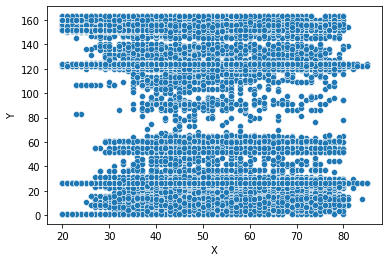

In [62]:
y = data.values
sns.scatterplot(y[:,0], y[:, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [63]:
def calculate_wcss(y, centroids, cluster):
  sum = 0
  for i, val in enumerate(y):
    sum += math.sqrt((centroids[int(cluster[i]), 0]-val[0])**2 +(centroids[int(cluster[i]), 1]-val[1])**2)
  return sum

In [64]:
def kmeans(y, k):
  diff = 1
  cluster = np.zeros(y.shape[0])
  centroids = data.sample(n=k).values
  while diff:
     for i, row in enumerate(y):
        mn_dist = float('inf')
        for idx, j in enumerate(centroids):
            a = (j[0] - row[0])**2
            b = (j[1] - row[1])**2
            d = math.sqrt(a + b)
            if mn_dist > d:
               mn_dist = d
               cluster[i] = idx
     new_centroids = pd.DataFrame(y).groupby(by=cluster).mean().values
     if np.count_nonzero(centroids-new_centroids) == 0:
        diff = 0
     else:
        centroids = new_centroids
  return centroids, cluster


In [65]:
cost_list = []
for k in range(1, 5):
    centroids, cluster = kmeans(y, k)
    cost = calculate_wcss(y, centroids, cluster)
    cost_list.append(cost)

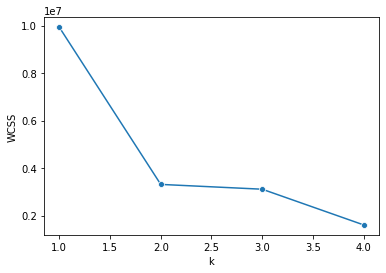

In [66]:
sns.lineplot(x=range(1, 5), y=cost_list, marker='o')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()

In [67]:
k = 3
centroids, cluster = kmeans(y, k)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


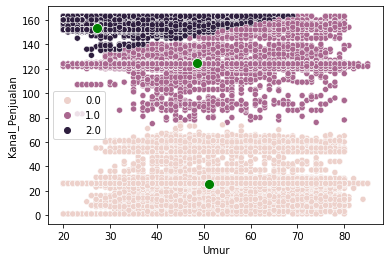

In [68]:
sns.scatterplot(y[:,0], y[:, 1], hue=cluster)
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='green')
plt.xlabel('Umur')
plt.ylabel('Kanal_Penjualan')
plt.show()

In [70]:
from sklearn.metrics import silhouette_score
score = silhouette_score(y, cluster)
score

0.7387740375896173